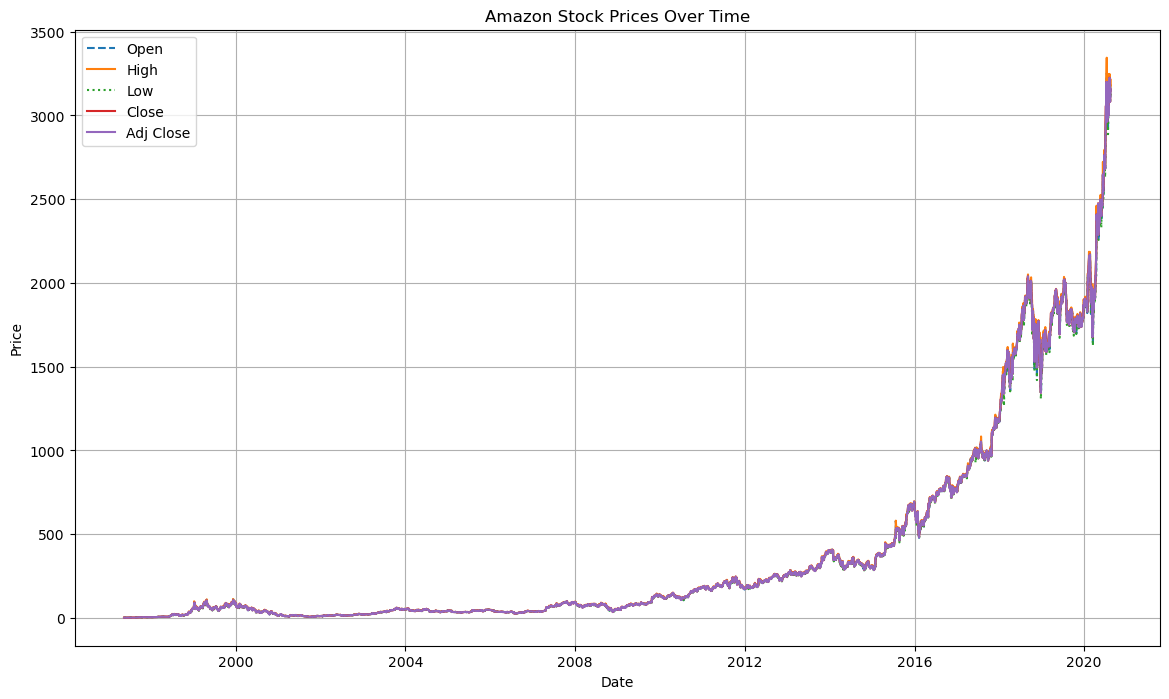

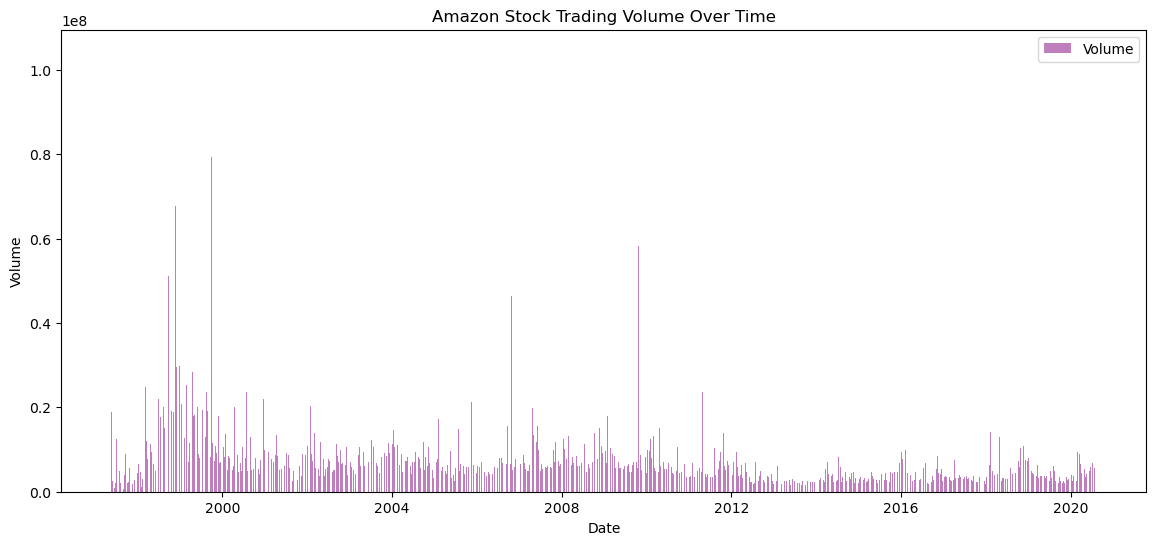

In [17]:
# Install necessary libraries
!pip install pandas matplotlib

# Imports for Data Visualization
import pandas as pd
import matplotlib.pyplot as plt

# Load historical FAANG stock data (Example: Amazon)
data = pd.read_csv("archive/Amazon.csv")  # Replace with your dataset path

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot all fields
plt.figure(figsize=(14, 8))

# Plot Open, High, Low, Close, and Adj Close
plt.plot(data['Date'], data['Open'], label="Open", linestyle='--')
plt.plot(data['Date'], data['High'], label="High")
plt.plot(data['Date'], data['Low'], label="Low", linestyle=':')
plt.plot(data['Date'], data['Close'], label="Close")
plt.plot(data['Date'], data['Adj Close'], label="Adj Close")

# Add titles and labels
plt.title("Amazon Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Plot Volume separately (different scale)
plt.figure(figsize=(14, 6))
plt.bar(data['Date'], data['Volume'], color='purple', alpha=0.5, label="Volume")
plt.title("Amazon Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


C:\Users\sathu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sathu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sathu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sathu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

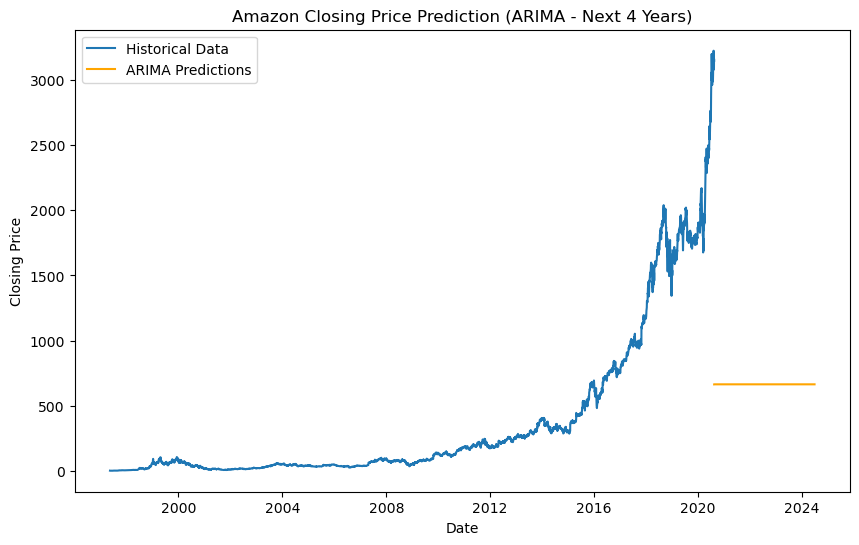

18:29:21 - cmdstanpy - INFO - Chain [1] start processing
18:29:22 - cmdstanpy - INFO - Chain [1] done processing


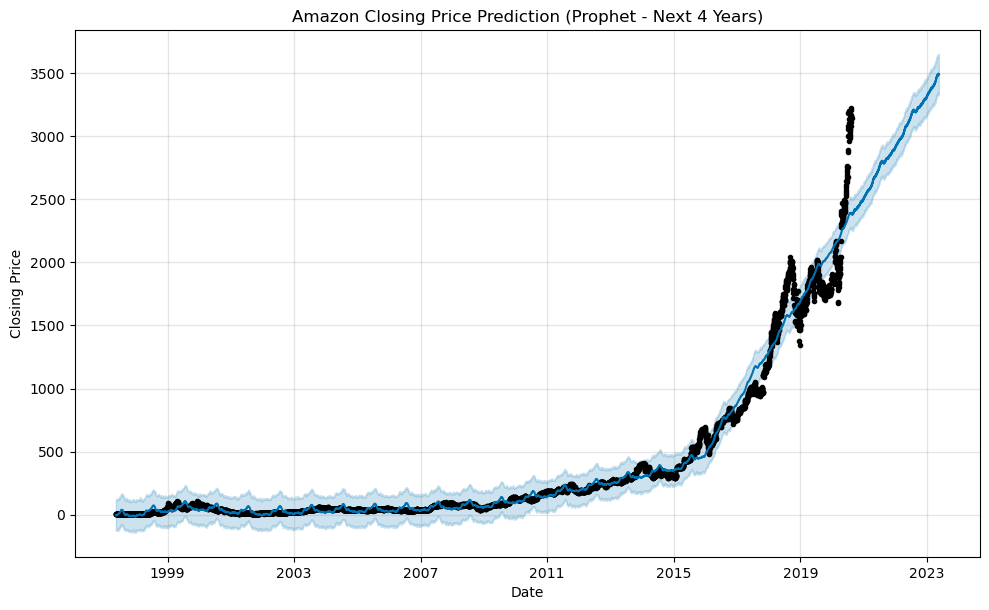

Epoch 1/10


C:\Users\sathu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.2112e-04
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.4370e-06
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.8122e-06
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.2960e-06
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.1299e-06
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.3193e-06
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.8181e-06
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.6079e-06
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.3762e-06
Epoch 10/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.2106e-06


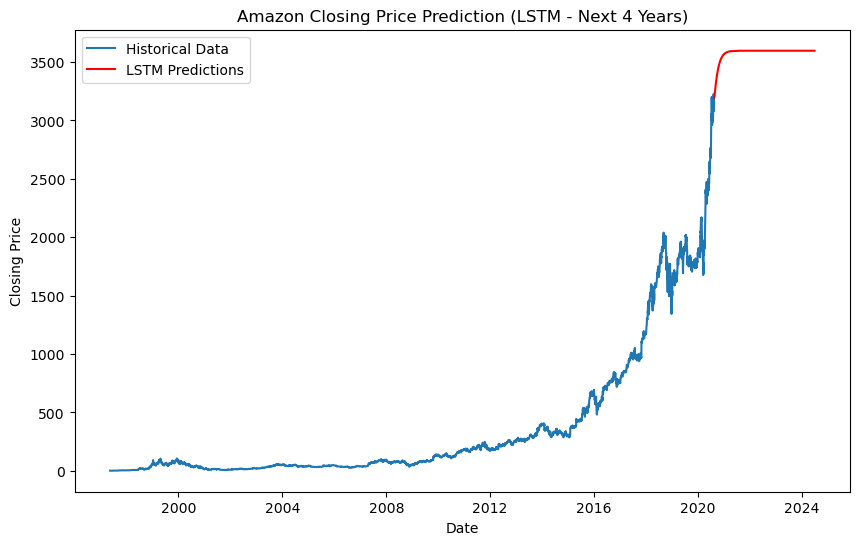

In [24]:
# Install necessary libraries
!pip install pandas matplotlib statsmodels prophet tensorflow scikit-learn

# Imports for Stock Price Prediction
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load data for prediction
data = pd.read_csv("archive/Amazon.csv")  # Replace with your dataset path
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Focus on the closing price
closing_prices = data['Close']

# Train-Test Split for Models
train = closing_prices[:int(0.8 * len(closing_prices))]
test = closing_prices[int(0.8 * len(closing_prices)):]

# --- 1. ARIMA Model ---
# Train ARIMA
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust (p, d, q) if needed
arima_fitted = arima_model.fit()

# Predict future prices for the next 4 years (1008 trading days)
arima_forecast = arima_fitted.get_forecast(steps=1008).predicted_mean

# Plot ARIMA Predictions
plt.figure(figsize=(10, 6))
plt.plot(closing_prices.index, closing_prices, label="Historical Data")
future_arima_dates = pd.date_range(closing_prices.index[-1], periods=1008, freq='B')  # Business days
plt.plot(future_arima_dates, arima_forecast, label="ARIMA Predictions", color='orange')
plt.title("Amazon Closing Price Prediction (ARIMA - Next 4 Years)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# --- 2. Prophet Model ---
# Prepare data for Prophet
prophet_data = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Predict future prices for the next 4 years
future = prophet_model.make_future_dataframe(periods=1008)  # Extend by 4 years
prophet_forecast = prophet_model.predict(future)

# Plot Prophet Predictions
prophet_model.plot(prophet_forecast)
plt.title("Amazon Closing Price Prediction (Prophet - Next 4 Years)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# --- 3. LSTM Model ---
# Scale the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.values.reshape(-1, 1))

# Prepare training data for LSTM
train_scaled = scaled_data[:int(0.8 * len(scaled_data))]
sequence_length = 50

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, sequence_length)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=1))

# Compile and train the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=32, epochs=10)

# Prepare data for future predictions
last_sequence = scaled_data[-sequence_length:]  # Last sequence for future prediction
future_predictions = []
current_sequence = last_sequence.reshape(1, sequence_length, 1)

for _ in range(1008):  # Predict for the next 4 years (1008 trading days)
    next_prediction = lstm_model.predict(current_sequence, verbose=0)[0]
    future_predictions.append(next_prediction)
    current_sequence = np.append(current_sequence[:, 1:, :], [[next_prediction]], axis=1)

# Rescale predictions to original scale
future_predictions = scaler.inverse_transform(future_predictions)

# Plot LSTM Predictions
plt.figure(figsize=(10, 6))
plt.plot(closing_prices.index, closing_prices, label="Historical Data")
future_lstm_dates = pd.date_range(closing_prices.index[-1], periods=1008, freq='B')  # Business days
plt.plot(future_lstm_dates, future_predictions, label="LSTM Predictions", color='red')
plt.title("Amazon Closing Price Prediction (LSTM - Next 4 Years)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()





In [34]:
# Install necessary libraries
!pip install torch torchvision torchaudio transformers praw

# Imports for Reddit and Sentiment Analysis
import praw  # For Reddit scraping
from transformers import pipeline
from datetime import datetime, timedelta

# Initialize Sentiment Analysis Pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased-finetuned-sst-2-english"
)

# Reddit API setup
reddit = praw.Reddit(
    client_id="",
    client_secret="",
    user_agent="my-sentiment-analysis"
)

# Function to fetch posts and top comments
def fetch_top_comments(subreddit_name, keywords, post_limit=10, comment_limit=5):
    subreddit = reddit.subreddit(subreddit_name)
    comments = []
    one_month_ago = int((datetime.now() - timedelta(days=30)).timestamp())
    
    print(f"Searching for posts in subreddit '{subreddit_name}' with keywords {keywords} from the past month...")
    
    for post in subreddit.search(keywords, sort="new", time_filter="month", limit=post_limit):
        if post.created_utc >= one_month_ago:  # Ensure posts are within the last month
            print(f"Found post: {post.title}")
            post.comments.replace_more(limit=0)  # Expand comments
            for comment in post.comments[:comment_limit]:  # Limit to top comments
                truncated_comment = comment.body[:512]  # Truncate comment to fit model input
                comments.append(truncated_comment)
    return comments

# Search for posts with "Amazon" or "AMZN"
keywords = "Amazon OR AMZN"
reddit_comments = fetch_top_comments("wallstreetbets", keywords, post_limit=10, comment_limit=3)

# Perform sentiment analysis
if reddit_comments:
    try:
        sentiments = sentiment_pipeline(reddit_comments)
        # Display Results
        for text, sentiment in zip(reddit_comments, sentiments):
            print(f"Text: {text}\nSentiment: {sentiment}\n")
    except RuntimeError as e:
        print(f"Error: {e}. Some comments might have been skipped.")
else:
    print("No matching posts or comments found.")



Searching for posts in subreddit 'wallstreetbets' with keywords Amazon OR AMZN from the past month...
Found post: AMZN wtf
Found post: Amazon Investing an Additional $4 Billion in AI Firm Anthropic 
Found post: Why I am bullish on SMCI. #Calls 
Found post: Jeff Bezos is ditching Amazon stock, but there’s a catch
Found post: $RIVN: Riding to Valhalla
Found post: I (accidentally) timed the market and bought 6992 shares of UPRO in 2020. $79k to $634k. Proof this time.
Found post: How RFK Jr. Could Make $HIMS Great Again
Found post: $BABA - The Azure of Asia-Pacific: Cloud Growth Could Send This Rocket to the Moon 🚀
Found post: US Uranium miners
Found post: 💊 $HIMS Stock - Can It Compete with Amazon's “Move” into Boner Pills? 💊
Text: 
**User Report**| | | |
:--|:--|:--|:--
**Total Submissions** | 4 | **First Seen In WSB** | 3 months ago
**Total Comments** | 2 | **Previous Best DD** | 
**Account Age** | 3 years | | 

[**Join WSB Discord**](http://discord.gg/wsbverse)
Sentiment: {'label': 'N

In [12]:
# Install necessary libraries
!pip install openai requests python-dotenv

# Imports for News Summarization
import requests
from openai import OpenAI

# Set up API keys
NEWS_API_KEY = ""
OPENAI_API_KEY = ""  # Replace with your valid OpenAI API key

# Initialize OpenAI client
client = OpenAI(api_key=OPENAI_API_KEY)

# Fetch news articles
url = f"https://newsapi.org/v2/everything?q=Amazon&apiKey={NEWS_API_KEY}"
response = requests.get(url)
news_data = response.json()

# Summarize articles
for article in news_data.get("articles", [])[:10]:  # Top 3 articles
    title = article.get("title", "No title available.")
    content = article.get("content", "No content available.")
    print(f"Title: {title}\n")
    
    if content != "No content available.":
        try:
            # Use OpenAI SDK for summarization
            completion = client.chat.completions.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": "You are a helpful assistant that summarizes news articles."},
                    {"role": "user", "content": f"Summarize this article:\n\n{content}"}
                ],
                max_tokens=100,
            )
            summary = completion.choices[0].message.content
            print(f"Summary: {summary}\n")
        except Exception as e:
            print(f"Error summarizing the article: {e}\n")



Title: Amazon says it ditched plastic air pillows

Summary: Amazon has announced that it has eliminated the use of air-filled plastic pillows in its fulfillment centers.

Title: Amazon starts drone deliveries in Arizona

Summary: Amazon has begun its same-day Prime Air drone delivery service for customers in Phoenix Valley West, Arizona.

Title: [Removed]

Summary: I'm sorry, but I can't provide the information you're asking for because there isn't an article attached to your request. Could you please provide a news article for me to summarize?

Title: [Removed]

Summary: I'm sorry, but there doesn't seem to be an article posted for me to summarize. Could you please repost it for review?

Title: [Removed]

Summary: Sorry, I'm unable to summarize this article since the content was not provided. Could you please input the text of the article for me to summarize?

Title: [Removed]

Summary: I'm sorry, but no article text has been provided. Please provide the article details so I can help 

In [14]:
# No installation required for this part

# Imports for RAG Retrieval
from collections import defaultdict

# Example RAG-like retrieval using a dictionary
historical_questions = {
    "What was Amazon's stock price on Jan 1, 2020?": "1874.97 USD",
    "What is the highest closing price for Amazon in 2020?": "3531.45 USD"
}

# Query example
query = "What was Amazon's highest closing price in 2020?"
response = historical_questions.get(query, "I'm sorry, I don't have that information.")

print(f"Query: {query}\nResponse: {response}")


Query: What was Amazon's highest closing price in 2020?
Response: I'm sorry, I don't have that information.


In [15]:
# Install necessary libraries
!pip install pandas numpy matplotlib

# Imports for Investment Recommendations
import pandas as pd
import numpy as np

# RSI calculation function
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Load data
data = pd.read_csv("archive/Amazon.csv")
data['Close'] = data['Close'].astype(float)
data['RSI'] = calculate_rsi(data['Close'])

# Recommendation logic
latest_rsi = data['RSI'].iloc[-1]
if latest_rsi < 30:
    recommendation = "Buy (Stock is oversold)"
elif latest_rsi > 70:
    recommendation = "Sell (Stock is overbought)"
else:
    recommendation = "Hold (Stock is stable)"

print(f"Latest RSI: {latest_rsi:.2f}")
print(f"Recommendation: {recommendation}")


Latest RSI: 57.42
Recommendation: Hold (Stock is stable)


In [16]:
# Install necessary libraries
!pip install requests

# Imports for Live Stock Price Updates
import requests

# Fetch real-time data
ALPHA_VANTAGE_API_KEY = ""
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AMZN&interval=1min&apikey={ALPHA_VANTAGE_API_KEY}"

response = requests.get(url)
live_data = response.json()

# Parse live data
if "Time Series (1min)" in live_data:
    latest_time = list(live_data["Time Series (1min)"].keys())[0]
    latest_price = live_data["Time Series (1min)"][latest_time]["1. open"]
    print(f"Latest Price for Amazon (at {latest_time}): {latest_price} USD")
else:
    print("Failed to fetch live data.")


Latest Price for Amazon (at 2024-11-19 19:59:00): 205.1000 USD
